In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [3]:
# make data for FB contour plot

pT_values = np.linspace(0.1, 10, 100)
Q_values = np.linspace(1, 10, 100)
fb_kins = dijet.Kinematics(z=0.4, x=0.01)

pT_grid = np.zeros((100, 100))
Q_grid = np.zeros((100, 100))
# fb_grid = np.zeros((100, 100))

dj = dijet.DIJET(constrained_moments=True)
dj.load_params('replica_params_pp.csv')

fb_values = {}
amps = ['N', 'Qu', 'Qd', 'Qs', 'G2', 'I3u', 'I3d', 'I3s', 'I4', 'I5']
for amp in amps: fb_values[amp] = np.zeros((100, 100))

for i, pT in enumerate(pT_values):
    for j, Q in enumerate(Q_values):

        pT_grid[i,j] = pT
        Q_grid[i,j] = Q*np.sqrt(fb_kins.z*(1-fb_kins.z))

        fb_kins.pT = pT
        fb_kins.Q = Q
        
        # fb_kins.s = 120**2
        # fb_kins.x = 0.001

        for amp in amps:
            fb_values[amp][i,j] = np.log(np.abs(dj.fourier_bessel(fb_kins, [[1,1,0,0]], amp)))


        

Using constrained moment parameters
loaded N(r^2, s) data from narr_ymin4.61_ymax14.91_AAMS09.dat
loaded polarized amp data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/d05-rc/
loaded params from replica_params_dis.csv
loaded random moment params from /dipoles/moment_params_dis.csv
loaded replica 1
loaded params from replica_params_pp.csv
loaded random moment params from /dipoles/moment_params_pp.csv


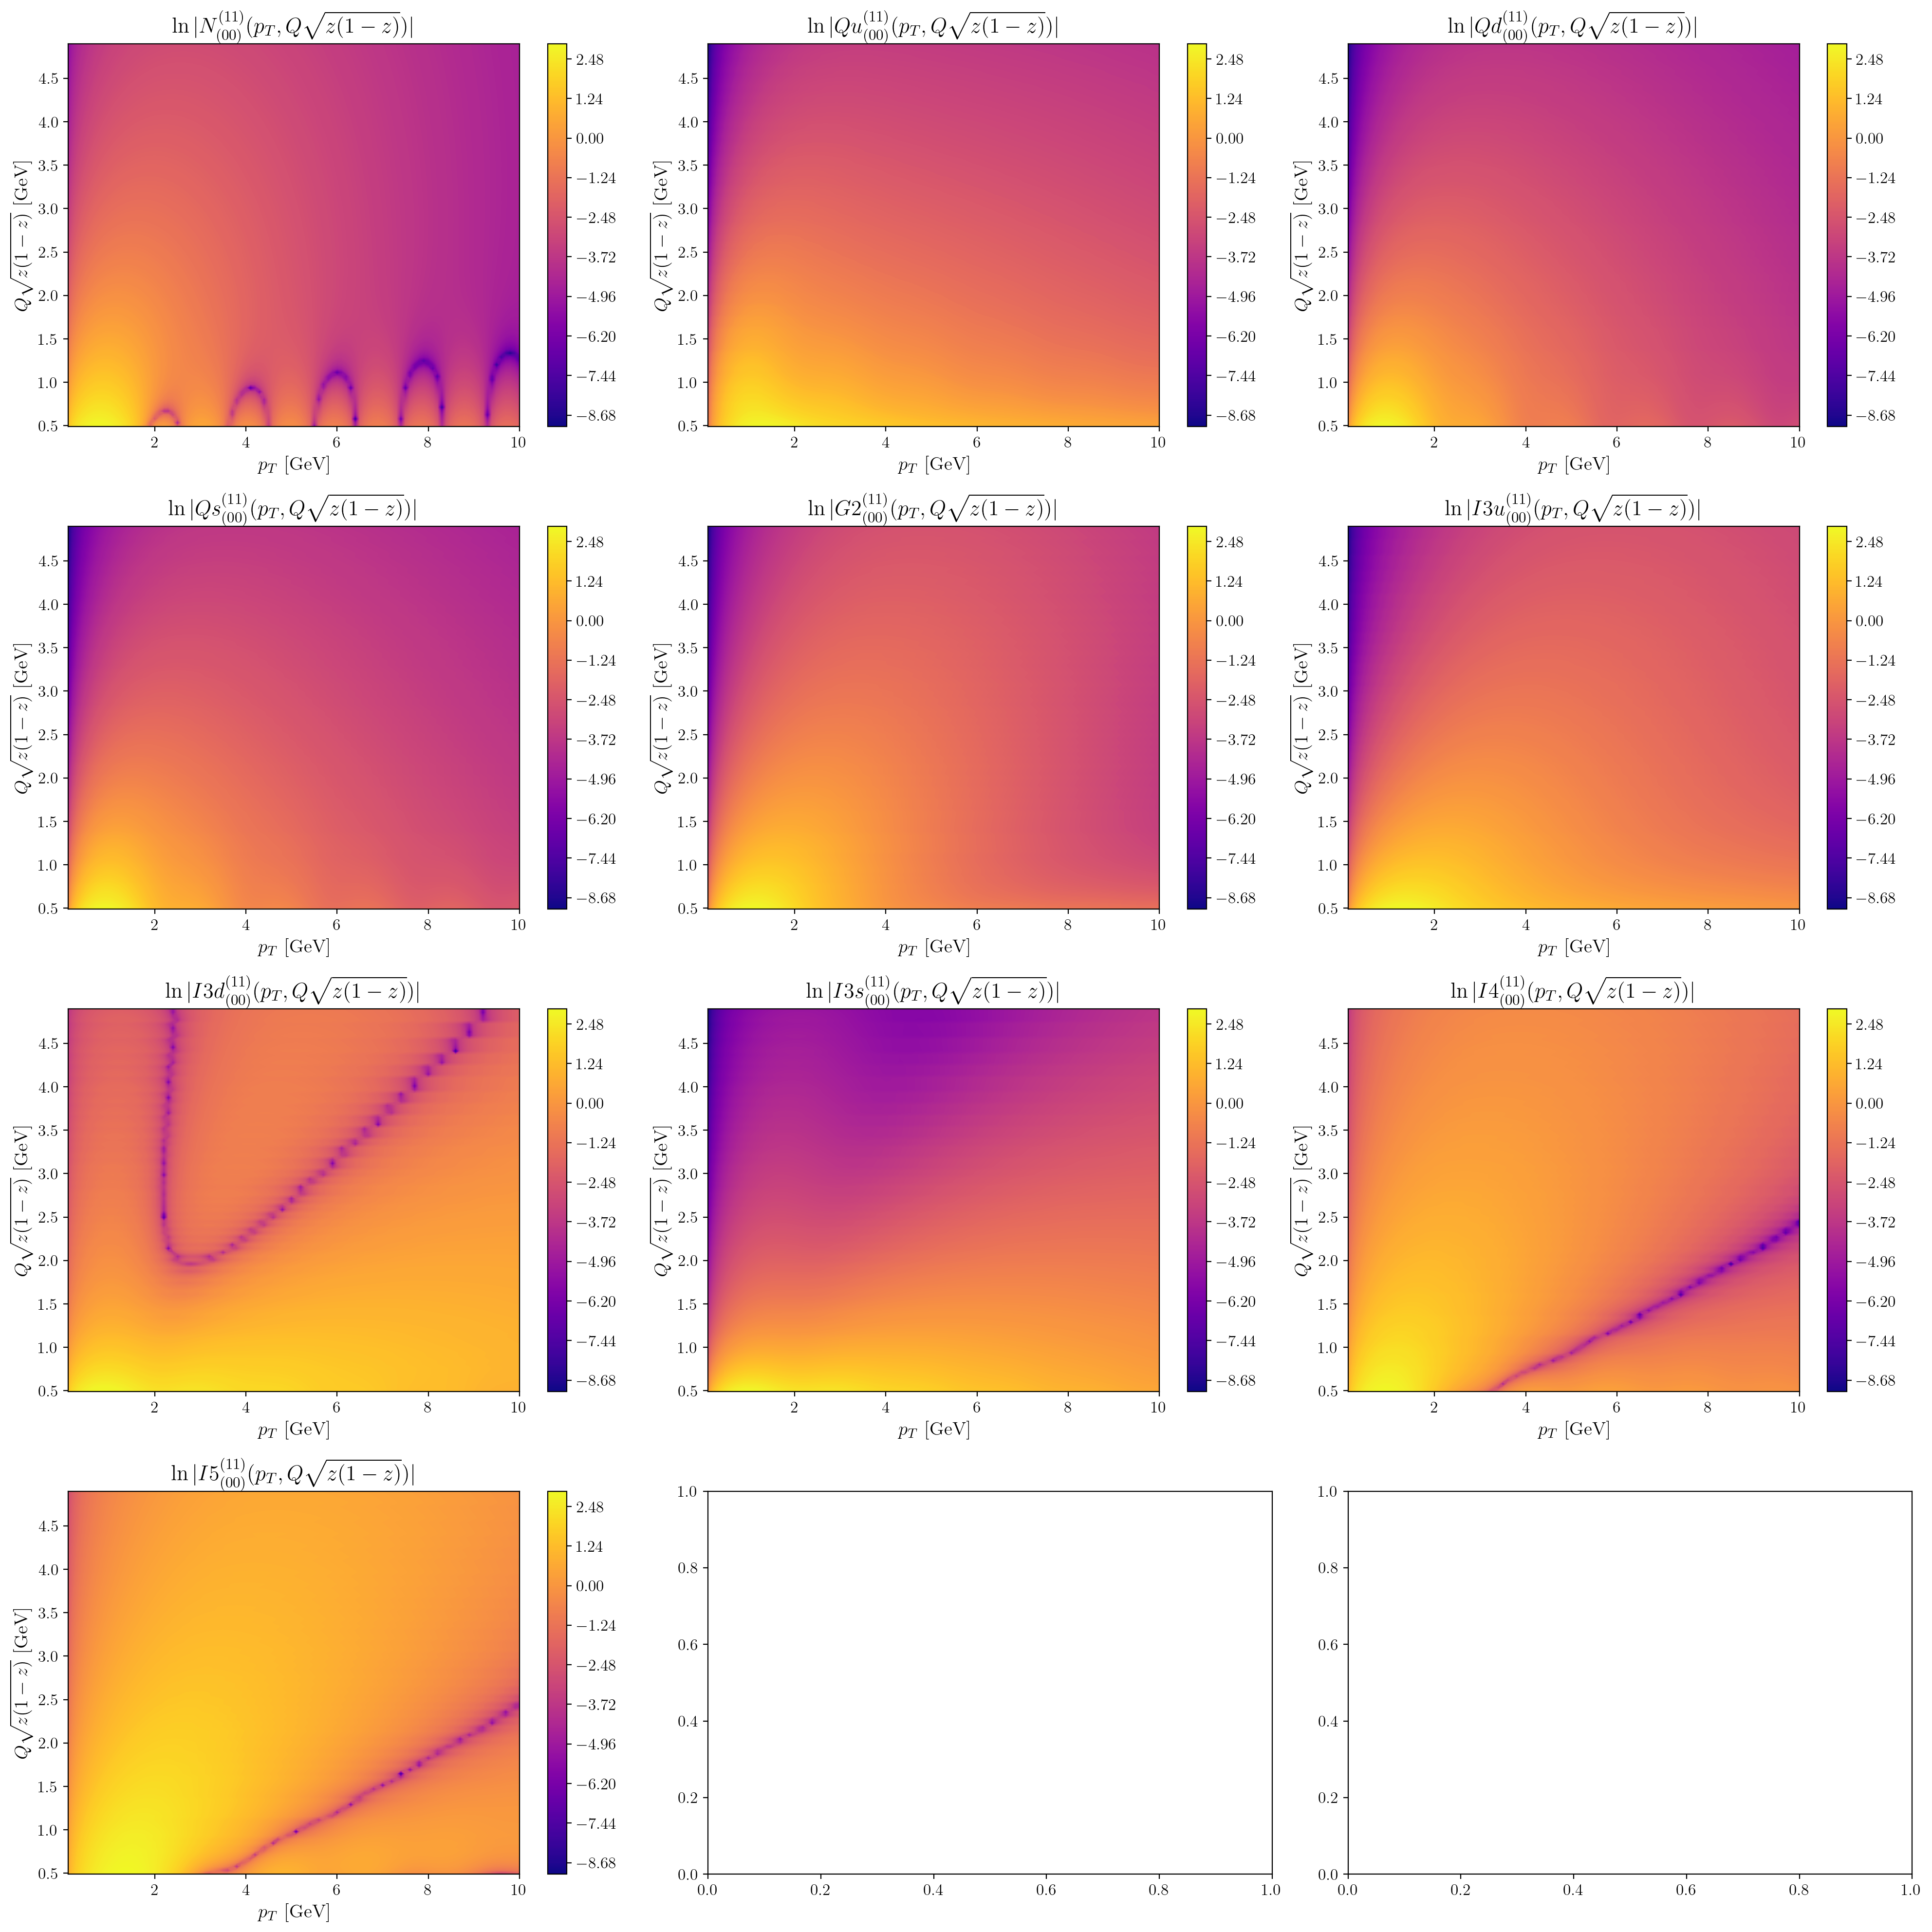

In [15]:
# make fb contour plot
asp_ratio = 4/3
psize = 5
fig, ax = plt.subplots(4, 3, figsize=(asp_ratio*psize*3, psize*4))

axs = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2], [3,0]]
for i, amp in enumerate(amps):
    if i == 0: 
        contour = ax[*axs[i]].contourf(pT_grid, Q_grid, fb_values[amp], levels=300, cmap='plasma')  # More levels = smoother
    else:
        ax[*axs[i]].contourf(pT_grid, Q_grid, fb_values[amp], levels=300, cmap='plasma')  # More levels = smoother
        
    cbar = fig.colorbar(contour, ax=ax[*axs[i]])
    ax[*axs[i]].set_xlabel(r'$p_T\,\,[\mathrm{GeV}]$')
    ax[*axs[i]].set_ylabel(r'$Q \sqrt{z(1-z)} \,\,[\mathrm{GeV}]$')
    ax[*axs[i]].set_title(fr'$\ln|{amp}^{{(11)}}_{{(00)}} (p_T, Q \sqrt{{z(1-z)}})|$')

# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()

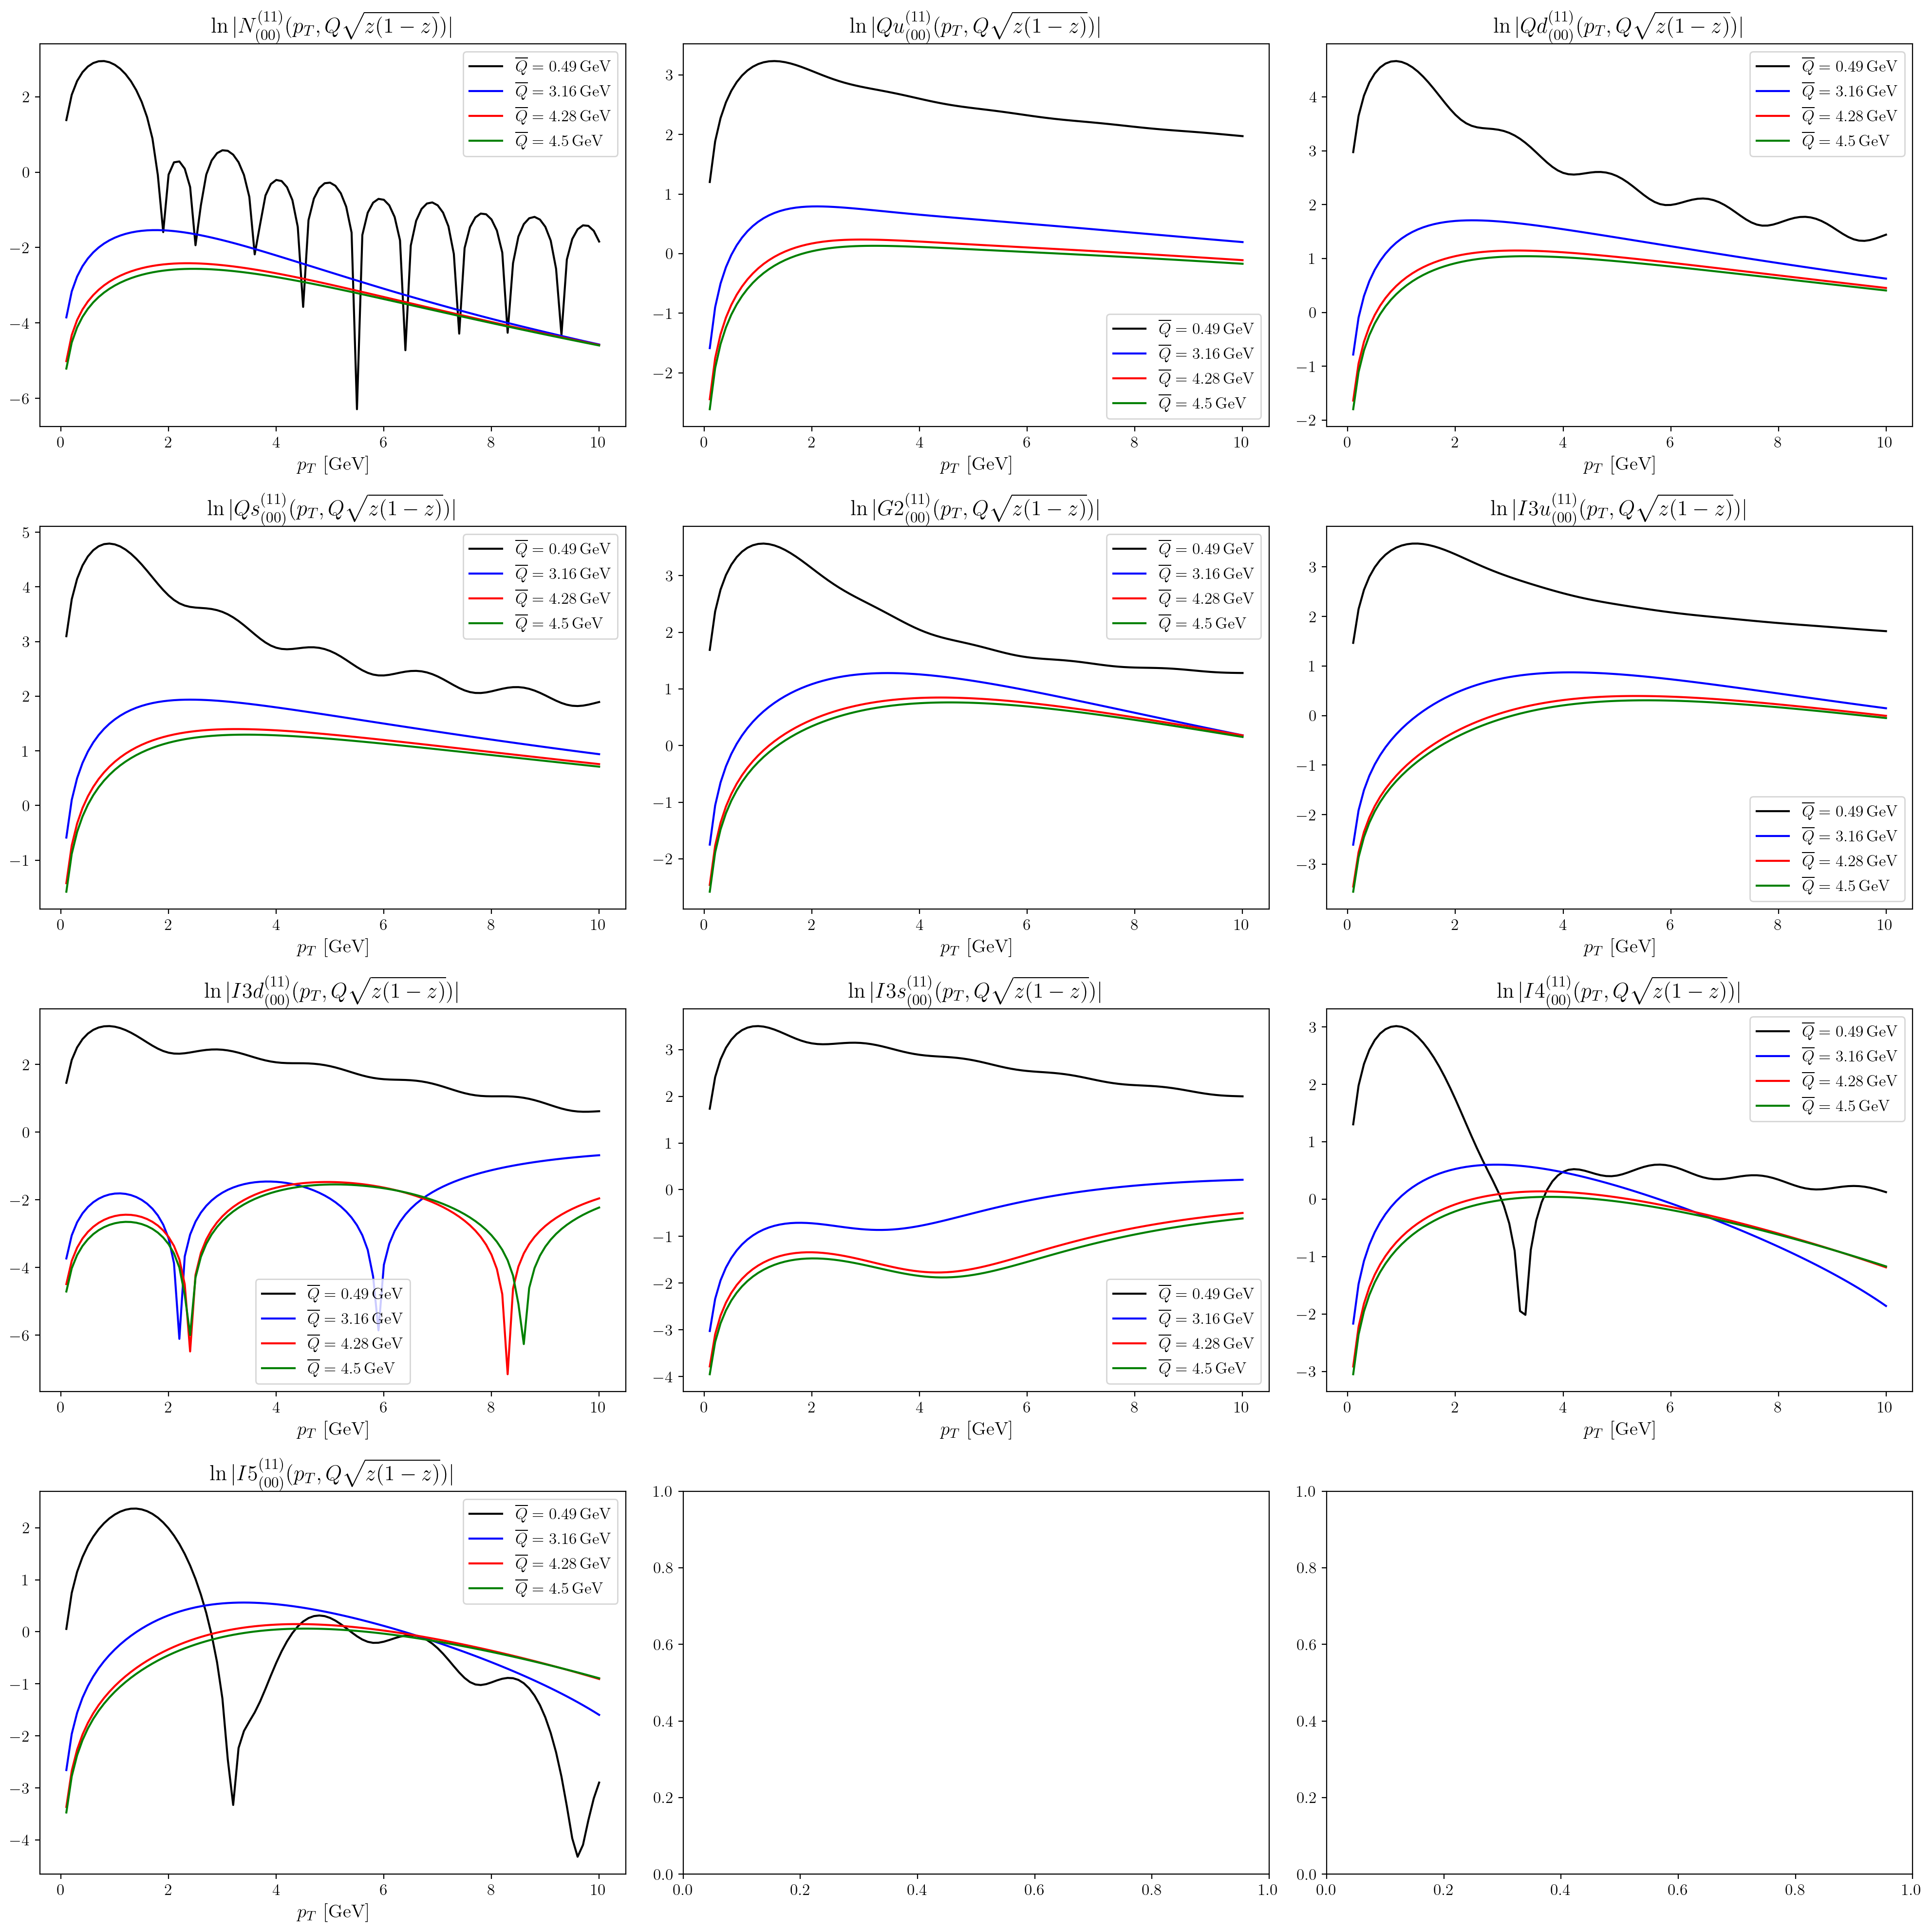

In [17]:
# make fb slice plots
asp_ratio = 4/3
psize = 5
fig, ax = plt.subplots(4, 3, figsize=(asp_ratio*psize*3, psize*4))

axs = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2], [3,0]]
for i, amp in enumerate(amps):

    colors = ['black', 'blue', 'red', 'green']
    for iQ, j in enumerate([0, 60, 85, 90]):
        ax[*axs[i]].plot(pT_grid[:,0], fb_values[amp][:,j], color=colors[iQ], label=rf'$\overline Q =  {round(Q_grid[0,j], 2)} \, \mathrm{{GeV}}$') 

    ax[*axs[i]].set_xlabel(r'$p_T\,\,[\mathrm{GeV}]$')
    ax[*axs[i]].set_title(fr'$\ln|{amp}^{{(11)}}_{{(00)}} (p_T, Q \sqrt{{z(1-z)}})|$')
    ax[*axs[i]].legend()
    

# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()